In [1]:
# !pip install yellowbrick

In [3]:
from yellowbrick.cluster import KElbowVisualizer

In [15]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import datasets 
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import matplotlib.pyplot as plt

# КЛАСТЕРИЗАЦИЯ

In [5]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [6]:
X.shape

(1797, 64)

In [7]:
y.shape

(1797,)

In [8]:
cmap = plt.cm.get_cmap('nipy_spectral', 10)

C:\Users\igumn\AppData\Local\Temp\ipykernel_5844\3764625745.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('nipy_spectral', 10)


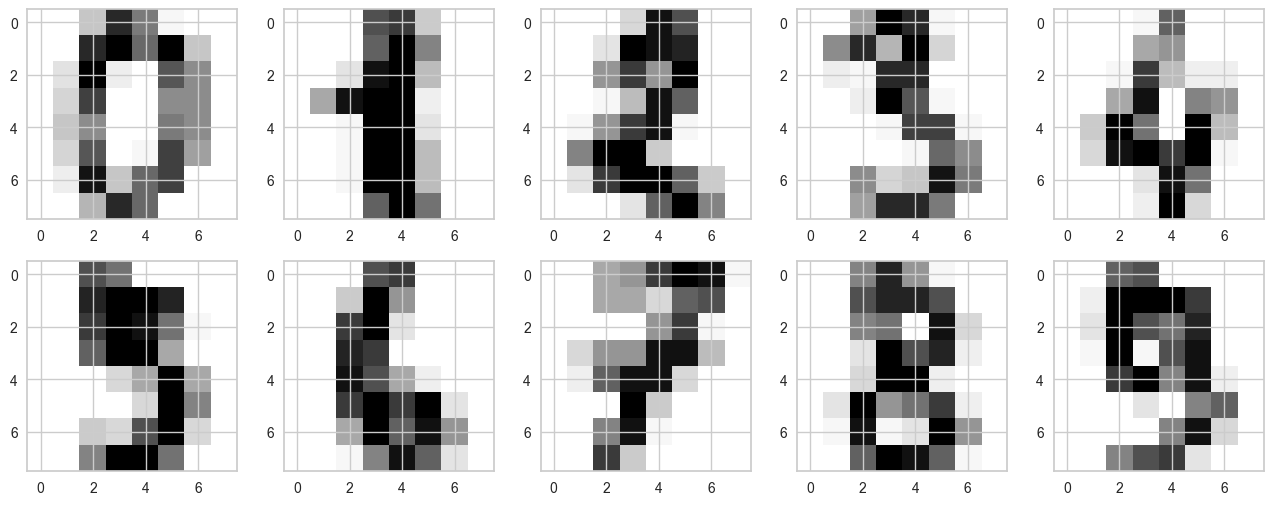

In [9]:
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i,:].reshape([8,8]));

Получается, размерность признакового пространства здесь – 64. Но давайте снизим размерность всего до 2 и увидим, что даже на глаз рукописные цифры неплохо разделяются на кластеры.

In [10]:
from sklearn.decomposition import PCA

Projecting 64-dimensional data to 2D


Text(0.5, 1.0, 'MNIST. PCA projection')

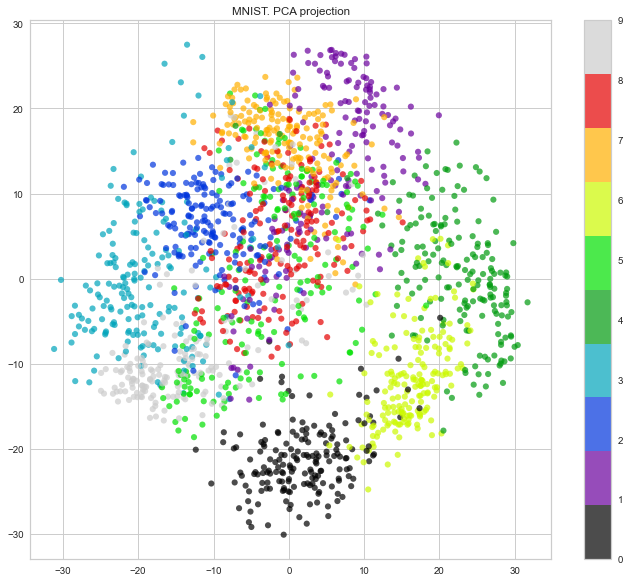

In [11]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

print('Projecting %d-dimensional data to 2D' % X.shape[1])

plt.figure(figsize=(12,10), dpi=70)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40, cmap=cmap)
#cmap=plt.cm.get_cmap('nipy_spectral', 10)
plt.colorbar()
plt.title('MNIST. PCA projection')

C t-SNE картинка получается еще лучше, поскольку у PCA ограничение – он находит только линейные комбинации исходных признаков. Зато даже на этом относительно небольшом наборе данных можно заметить, насколько t-SNE дольше работает.

C:\Users\igumn\miniforge3\envs\hock\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


CPU times: total: 12.9 s
Wall time: 12.4 s


Text(0.5, 1.0, 'MNIST. t-SNE projection')

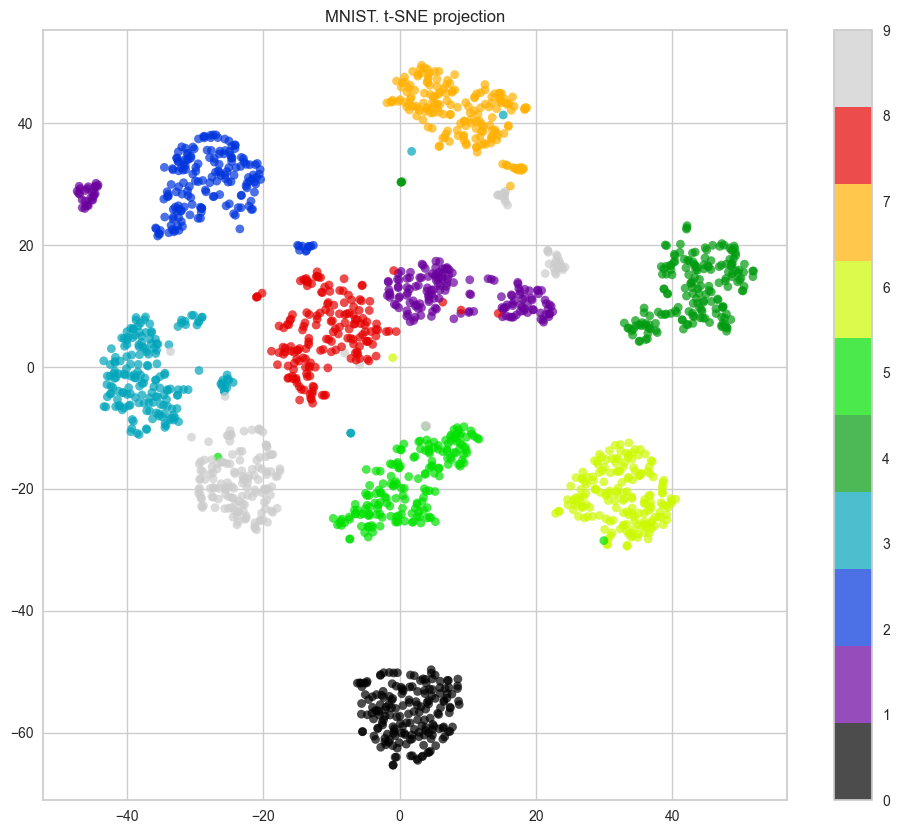

In [12]:
%%time

from sklearn.manifold import TSNE
tsne = TSNE(random_state=42, max_iter=1000)

X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(12,10))

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=cmap)

plt.colorbar()
plt.title('MNIST. t-SNE projection')

## Иерархическая кластеризация

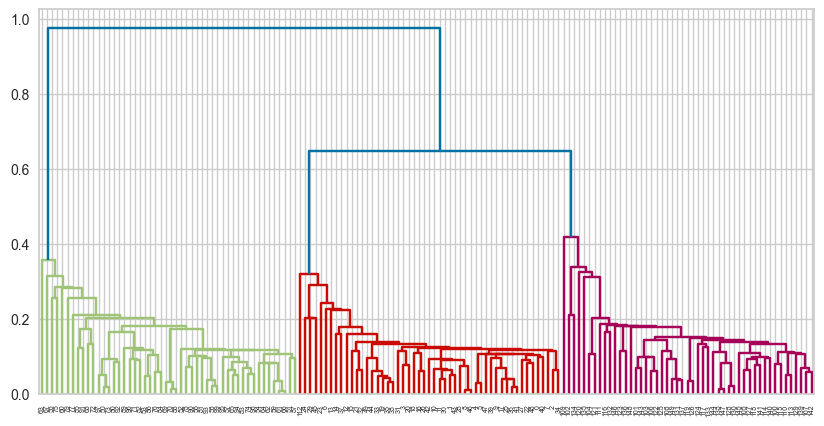

In [13]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

X = np.zeros((150, 2))

np.random.seed(seed=42)
X[:50, 0] = np.random.normal(loc=0.0, scale=.3, size=50)
X[:50, 1] = np.random.normal(loc=0.0, scale=.3, size=50)

X[50:100, 0] = np.random.normal(loc=2.0, scale=.5, size=50)
X[50:100, 1] = np.random.normal(loc=-1.0, scale=.2, size=50)

X[100:150, 0] = np.random.normal(loc=-1.0, scale=.2, size=50)
X[100:150, 1] = np.random.normal(loc=2.0, scale=.5, size=50)

distance_mat = pdist(X) # pdist посчитает нам верхний треугольник матрицы попарных расстояний

Z = hierarchy.linkage(distance_mat, 'single') # linkage — реализация агломеративного алгоритма
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, color_threshold=0.5)

<Axes: >

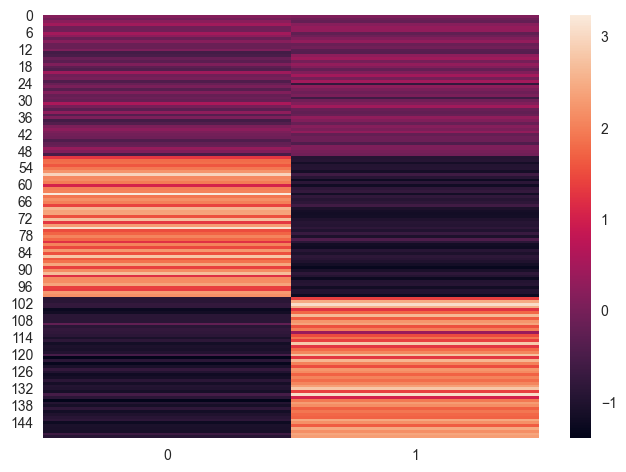

In [17]:
sns.heatmap(X)

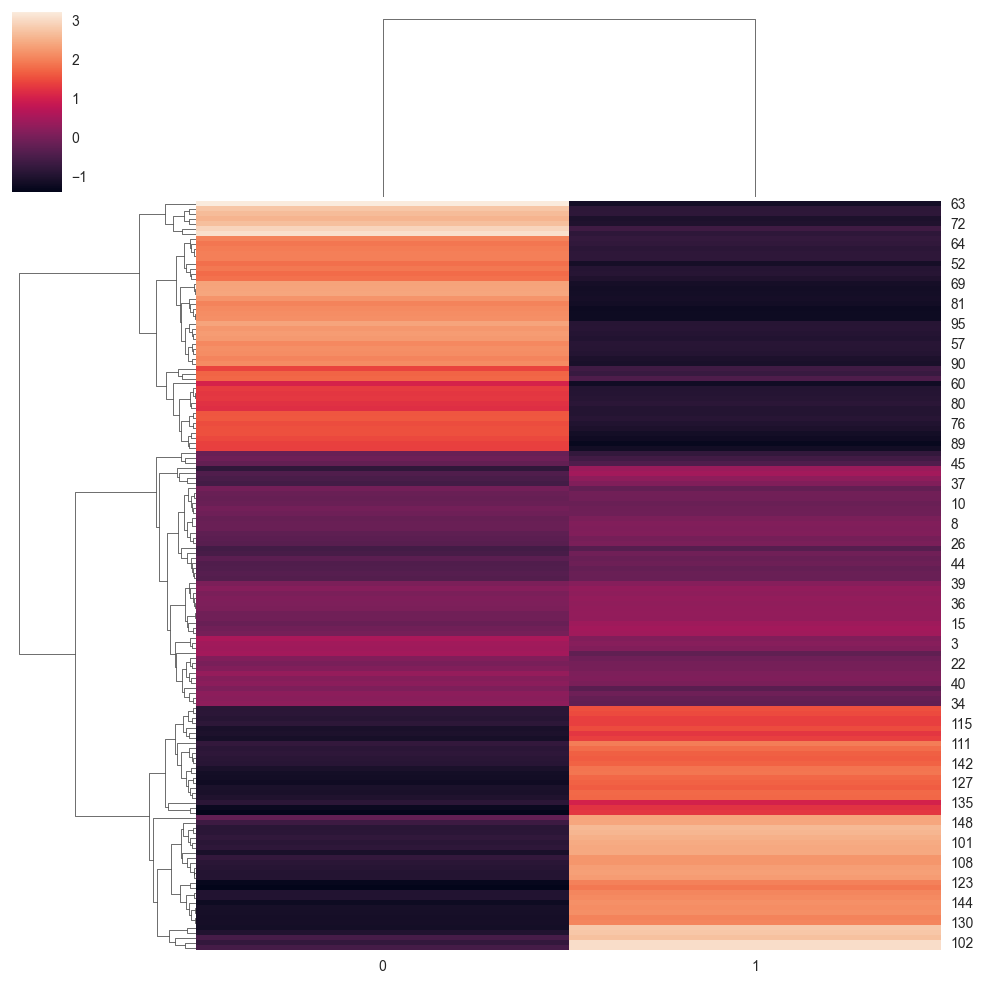

In [18]:
sns.clustermap(X)

## K-Means кластеризация

(-15.0, 15.0)

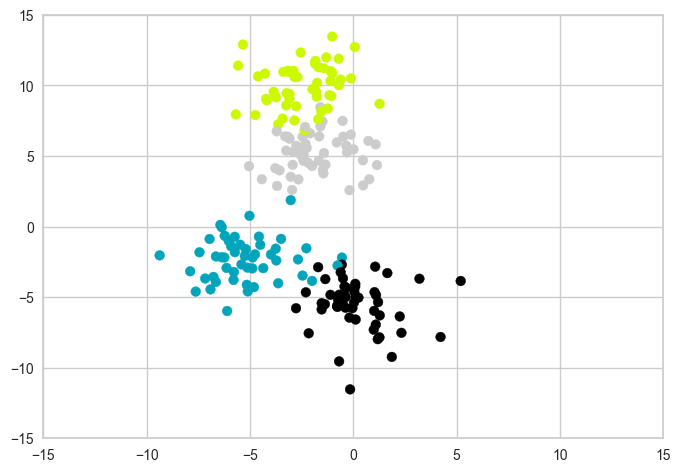

In [19]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt# create blobs
data = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.6, random_state=50)# create np array for data points
points = data[0]# create scatter plot
plt.scatter(data[0][:,0], data[0][:,1], c=data[1], cmap=cmap)
plt.xlim(-15,15)
plt.ylim(-15,15)

У нас есть четыре цветных кластера, но есть некоторое совпадение с двумя кластерами сверху, а также с двумя кластерами снизу. Первым шагом в кластеризации k-средних является выбор случайных центроидов. Так как в этом случае наше k = 4, нам понадобится 4 случайных центроида. Вот как это выглядело в моей реализации с нуля.

[[-0.29701977 -4.46570785]
 [-1.92101646  5.21673484]
 [-2.40167949 10.17352695]
 [-5.56465793 -2.34988939]
 [ 0.9580522  -7.66679334]]


(-15.0, 15.0)

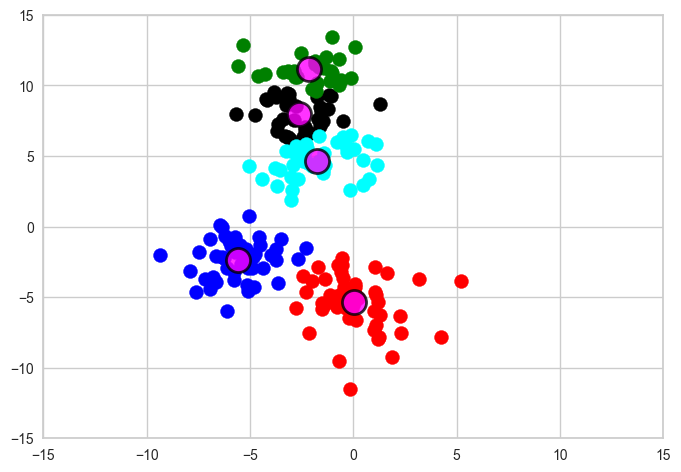

In [48]:
# import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# create kmeans object
kmeans = KMeans(n_clusters=5)# fit kmeans object to data
kmeans.fit(points)# print location of clusters learned by kmeans object
print(kmeans.cluster_centers_)# save new clusters for chart
y_km = kmeans.fit_predict(points)

# centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='magenta', 
            alpha=0.8, s=300, zorder=3, edgecolor='black', linewidth=2)

plt.scatter(points[y_km ==0,0], points[y_km == 0,1], s=100, c='red')
plt.scatter(points[y_km ==1,0], points[y_km == 1,1], s=100, c='black')
plt.scatter(points[y_km ==2,0], points[y_km == 2,1], s=100, c='blue')
plt.scatter(points[y_km ==3,0], points[y_km == 3,1], s=100, c='cyan')
plt.scatter(points[y_km ==4,0], points[y_km == 4,1], s=100, c='green')
plt.xlim(-15,15)
plt.ylim(-15,15)

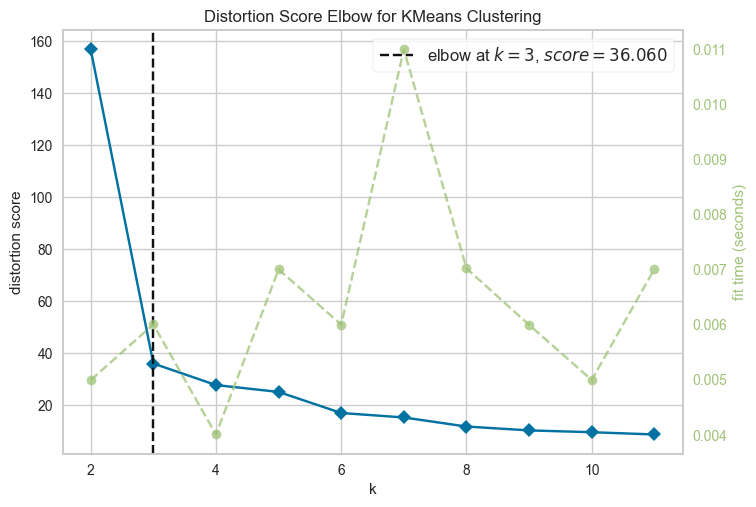

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

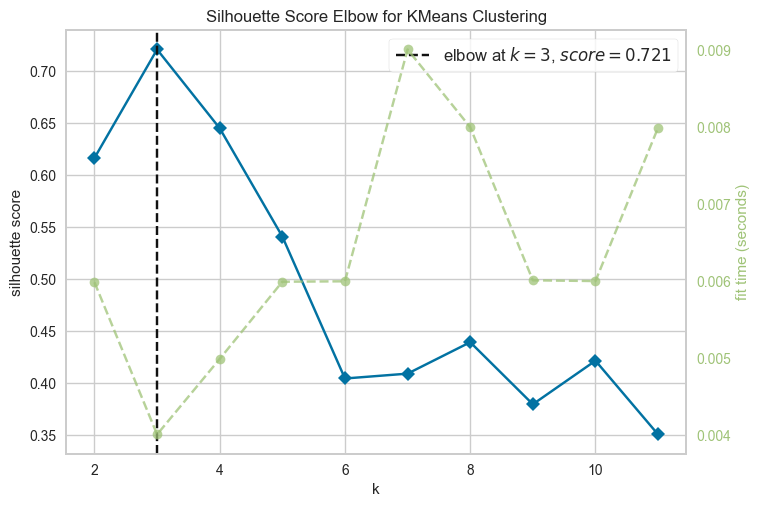

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [31]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12), metric='silhouette')

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [38]:
kmeans.cluster_centers_

array([[-5.50955539, -2.25816149],
       [-2.13583883,  7.57989854],
       [ 0.05161133, -5.35489826]])

[[-1.97749004  5.13572691]
 [-2.4754646  -4.03745742]
 [-2.40167949 10.17352695]]


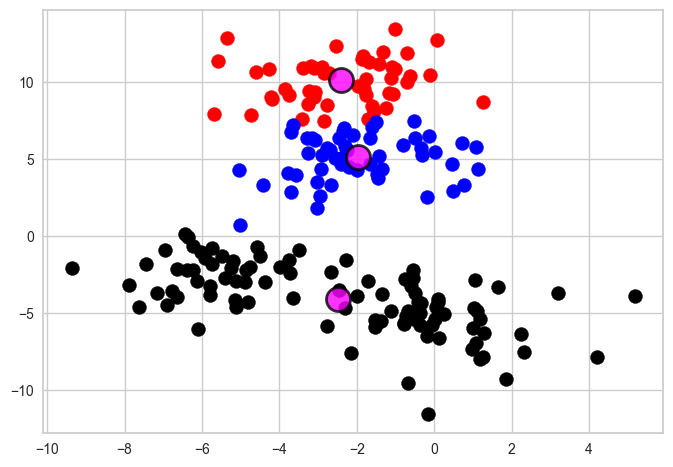

In [46]:
# import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# create kmeans object
kmeans = KMeans(n_clusters=3)# fit kmeans object to data
kmeans.fit(points)# print location of clusters learned by kmeans object
print(kmeans.cluster_centers_)# save new clusters for chart

# centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='magenta', 
            alpha=0.8, s=300, zorder=3, edgecolor='black', linewidth=2)

y_km = kmeans.fit_predict(points)

plt.scatter(points[y_km ==0,0], points[y_km == 0,1], s=100, c='red')
plt.scatter(points[y_km ==1,0], points[y_km == 1,1], s=100, c='black')
plt.scatter(points[y_km ==2,0], points[y_km == 2,1], s=100, c='blue')

# Метрики

Хорошая ознакомительная статья про метрики оценки качества кластеризации: https://habr.com/ru/company/ods/blog/325654/

#### Гомогенность, полнота, V-мера  
Она является симметричной и показывает, насколько две кластеризации схожи между собой.

#### Силуэт
Данный коэффициент не предполагает знания истинных меток объектов, и позволяет оценить качество кластеризации, используя только саму (неразмеченную) выборку и результат кластеризации.  

Силуэт показывает, насколько среднее расстояние до объектов своего кластера отличается от среднего расстояния до объектов других кластеров.

### DBSCAN
https://www.youtube.com/watch?v=RDZUdRSDOok
Обязательно к просмотру для понимания работы алгоритма!

In [52]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import silhouette_score
# from sklearn.metrics import v_measure_score

In [53]:
X, y = make_moons(n_samples=500, noise=0.1)
df=pd.DataFrame(X,y)
df=df.rename(columns={0: "X1", 1:"X2"})
df.head()

,X1,X2
0,-0.743180,0.858014
1,1.581366,-0.365497
0,0.882382,0.217393
0,-0.914935,-0.015674
1,-0.132148,0.402341


Text(0, 0.5, '$x_2$')

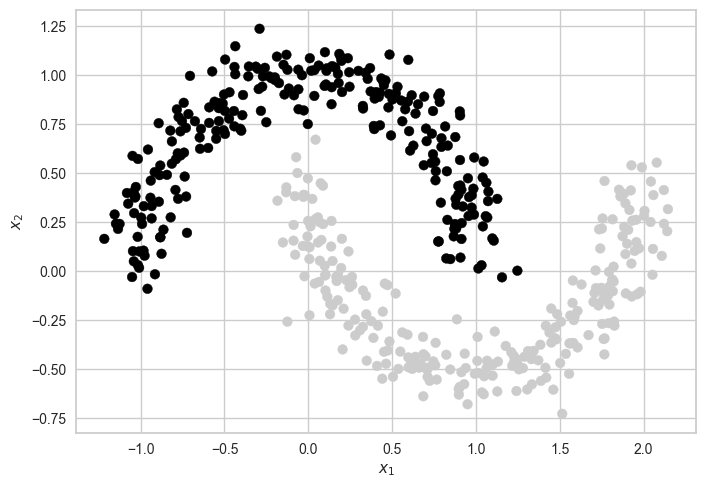

In [54]:
plt.scatter(X[:, 0], X[:, 1], c=y, label=y, cmap=cmap)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

Text(0, 0.5, '$x_2$')

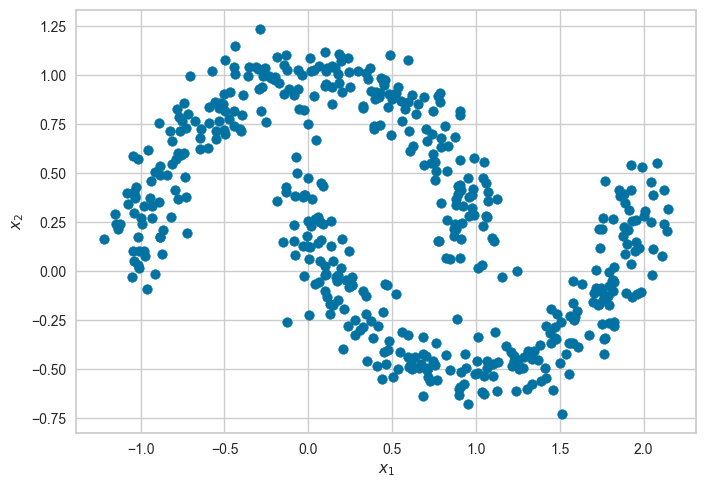

In [55]:
plt.scatter(X[:, 0], X[:, 1],label=y)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

Text(0, 0.5, '$x_2$')

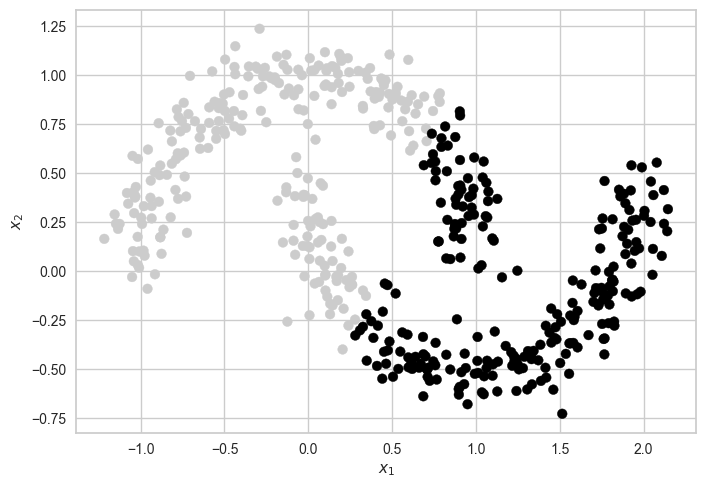

In [56]:
model = KMeans(2)
y_pred = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1],label=y, c=y_pred, cmap=cmap)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

Text(0, 0.5, '$x_2$')

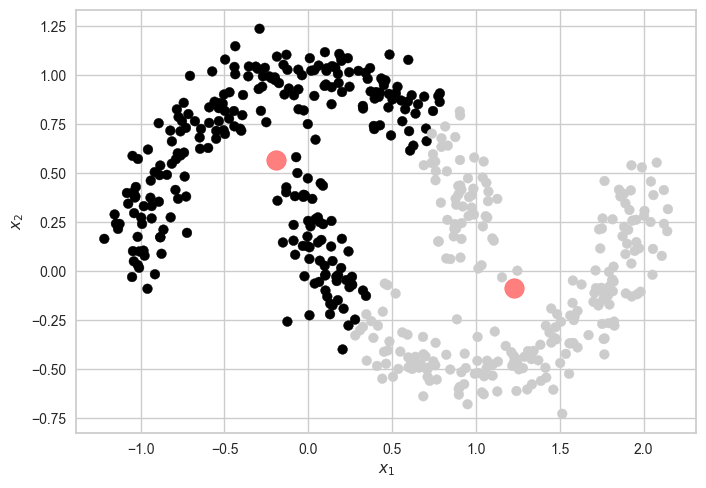

In [57]:
model = KMeans(2)
y_pred = model.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1],label=y, c=y_pred, cmap=cmap)

for centroid in model.cluster_centers_:
    plt.scatter(centroid[0], centroid[1], c='red', s=200, alpha=0.5)
    
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

Estimated no. of clusters: 1
Estimated no. of noise points: 0
v_measure = 0.0


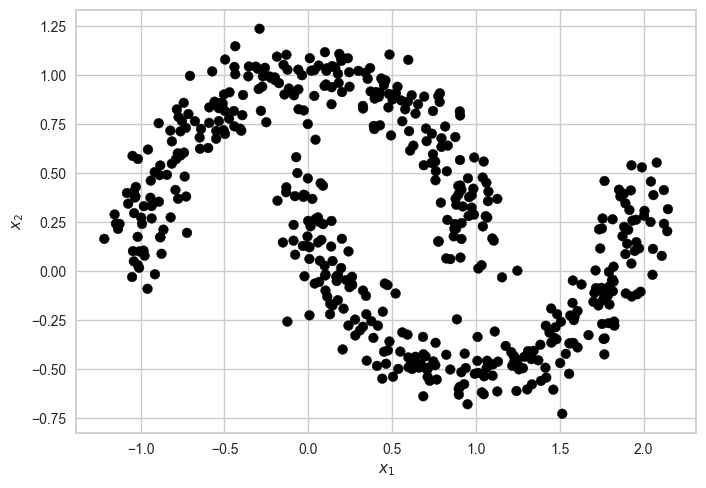

In [59]:
dbscan_cluster1 = DBSCAN()
dbscan_cluster1.fit(X)

# Visualizing DBSCAN
plt.scatter(X[:, 0], 
            X[:, 1], 
            c=dbscan_cluster1.labels_, 
            label=y, cmap=cmap)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

# Number of Clusters
labels=dbscan_cluster1.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster1.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))

Estimated no. of clusters: 14
Estimated no. of noise points: 126
v_measure = 0.33206790860224783


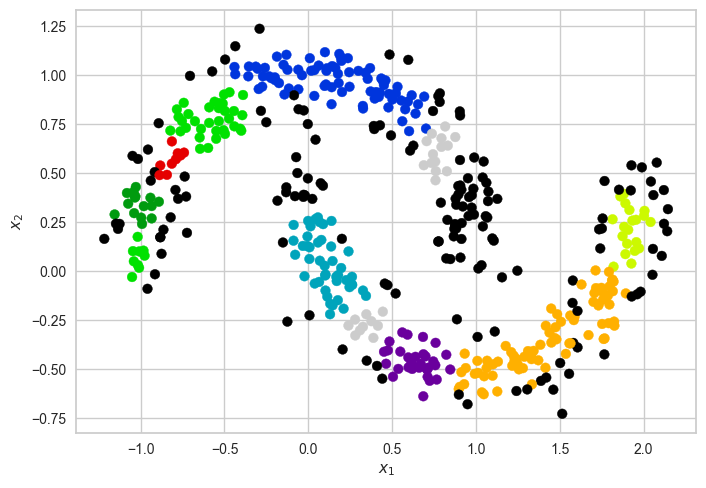

In [61]:
dbscan_cluster = DBSCAN(eps=0.1, min_samples=8)
dbscan_cluster.fit(X)

# Visualizing DBSCAN
plt.scatter(X[:, 0], 
            X[:, 1], 
            c=dbscan_cluster.labels_, 
            label=y,
           cmap=cmap)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

# Number of Clusters
labels=dbscan_cluster.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))

In [69]:
from sklearn.neighbors import NearestNeighbors

nearest_neighbors = NearestNeighbors(n_neighbors=9)
neighbors = nearest_neighbors.fit(df)

In [70]:
distances, indices = neighbors.kneighbors(df) 

In [71]:
distances

array([[0.        , 0.0527981 , 0.06378188, ..., 0.1282621 , 0.14218706,
        0.14662973],
       [0.        , 0.01697729, 0.02367419, ..., 0.10279958, 0.11460914,
        0.11634324],
       [0.        , 0.01093234, 0.01173182, ..., 0.06175817, 0.06868416,
        0.0976479 ],
       ...,
       [0.        , 0.02436293, 0.033437  , ..., 0.08038225, 0.0805181 ,
        0.08859838],
       [0.        , 0.05092854, 0.06489435, ..., 0.1186142 , 0.12106318,
        0.13010523],
       [0.        , 0.040842  , 0.05302209, ..., 0.08021611, 0.08501621,
        0.10002114]])

Text(0, 0.5, 'Distance')

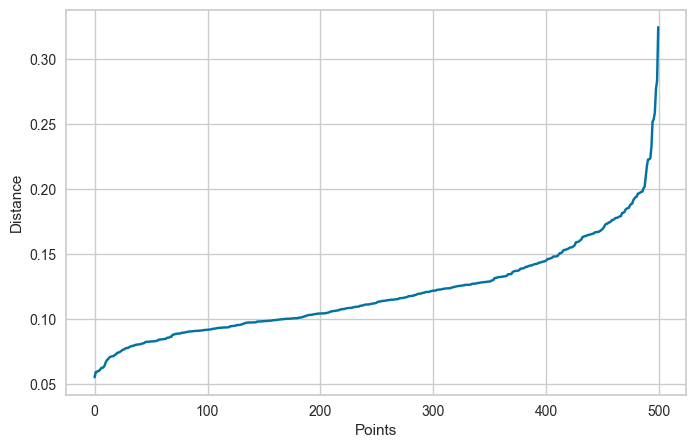

In [72]:
distances, indices = neighbors.kneighbors(df) 
distances = np.sort(distances[:,-1], axis=0)

fig = plt.figure(figsize=(8, 5))
plt.plot(distances)
# plt.hlines(0.15, 0, 500)
plt.xlabel("Points")
plt.ylabel("Distance")

In [29]:
# !pip install kneed

In [74]:
from kneed import KneeLocator

In [75]:
knd = KneeLocator(np.arange(1, distances.size+1), distances, curve='convex')
# knd.plot_knee_normalized()
print(knd.knee_y)

0.1858025019231979


Text(0, 0.5, 'Distance')

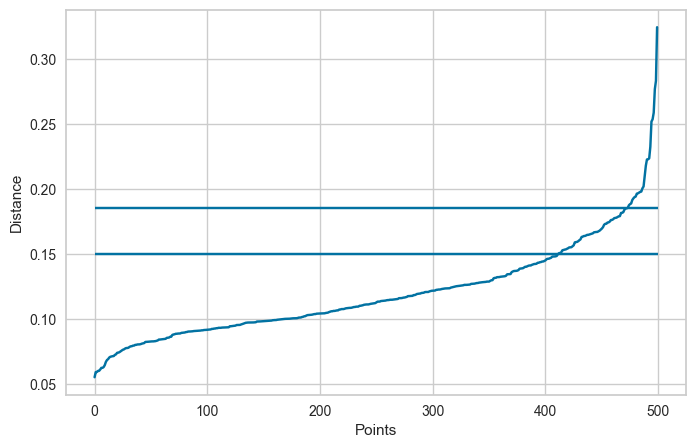

In [76]:
distances, indices = neighbors.kneighbors(df) 
distances = np.sort(distances[:,-1], axis=0)

fig = plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.hlines(0.15, 0, 500)
plt.hlines(knd.knee_y, 0, 500)
plt.xlabel("Points")
plt.ylabel("Distance")

Estimated no. of clusters: 2
Estimated no. of noise points: 1
v_measure = 0.9573725164328405


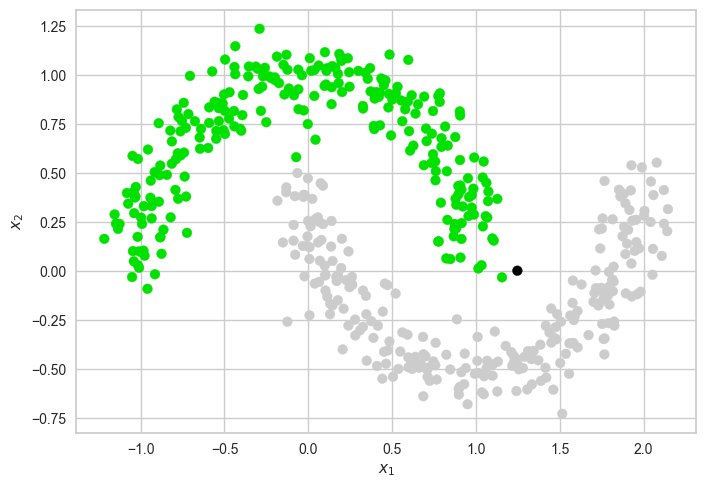

In [77]:
# from kneed import KneeLocator # определяет лучшее значение eps

dbscan_cluster = DBSCAN(eps=knd.knee_y, min_samples=8)
dbscan_cluster.fit(X)

# Visualizing DBSCAN
plt.scatter(X[:, 0], 
    X[:, 1], 
    c=dbscan_cluster.labels_, 
    cmap=cmap,
    label=y)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

# Number of Clusters
labels=dbscan_cluster.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))

Text(0, 0.5, '$x_2$')

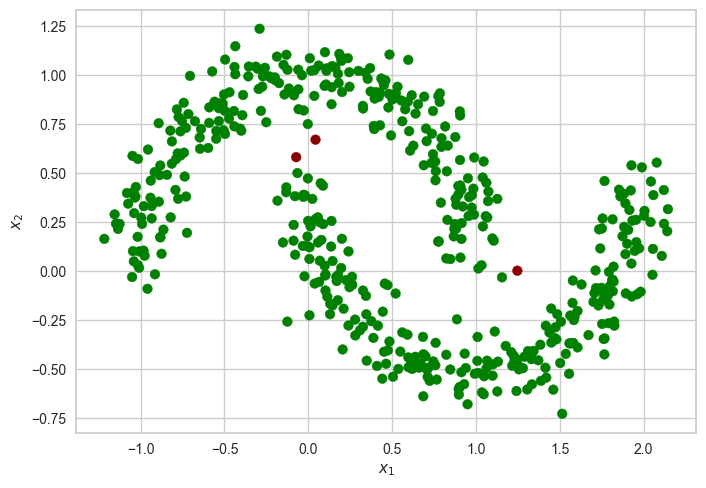

In [87]:
# Visualizing DBSCAN

answers = pd.Series(labels == y).map({True:'green', False: 'darkred'})

plt.scatter(X[:, 0], 
    X[:, 1], 
    c=answers)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")